# Chapter 3: Functional Regression

In [2]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 2.1 Introduction & Motivation

In the previous chapter, we saw how we could use the linear function to accurately draw a line through a cloud of points, and how this might give us predictive value in some situations. In this chapter, we move a little bit further. We're still looking for a function that approximates the relationship we find among variables, but we're no longer working with linear functions. In this case, we're working with *polynomial functions*. This results into **polynomial regression** as a method.

## 2.2 Problem Setting

In the previous chapter, we already discussed how the Linear Regression model, though strong, has its limitations. Most importantly, the linear regression model van only model linear relations between variables. It should be noted that this is extremely limiting, and that there are a bunch of relationship variables who might not be linear. (For what exactly a linear relationship is, refer back to the 4 points we defined in chapter 1.)

##### Question 1: Can you think of relationships of variables which are definitely not linear? Give 3 examples, and explain why this is the case.

To give an example of how such data would look, let's generate a dataset which is definitely not linear:

In [3]:
x = np.linspace(0, 3, 100) 
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's make a scatterplot to illustrate the non-linearity of this dataset:

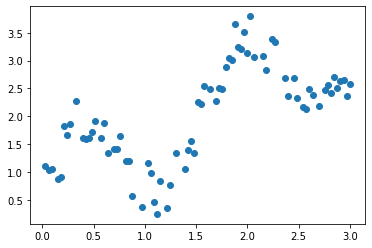

In [4]:
plt.scatter(X_train, y_train)
plt.show()

##### Question 2: Why is this dataset not linear? Elaborate.

##### Question 3: Try to fit a linear regression model on this data. Also calculate the evaluation metrics. Does this model make any sense whatsoever? How would you describe the issue?

## 2.3 Model

### 2.3.1 Model

The model we'll use to fit this type of data is called the **Polynomial Regression Model** and is in essence a generalization of the Linear Regression Model. Where the linear regression model is based upon a linear function, the Polynomial Regression Model is based upon a much broader class of functions in order to include much more complicated function patterns: 

$$y = \beta_0 + \beta_1 x^1 + \beta_2 x^2 + \beta_3 x^3 + ...$$ 

You do not need to know the function formula, you should just understand the following things:

* Polynomial Regression works with a much broader class of functions than Linear Regression
* This allows us to also model non-linear patters
* Polynomial Regression requires a "hyperparameter"

The hyperparameter we refer to, is a number from 0, 1, 2, ... up to as much you wish (though only seldom values above 7 are encountered). This value determines the form of a function. It says how many arches can be found in the function. This number is something we have to give to the model before fitting it.

The fitting algorithms then once again takes care of the rest.

### 2.3.2 Model Estimation

As said in the previous section, when we want to fit a Polynomial Regression Model, we first have to give the model a certain value for the hyperparameter. Let's start with 0 and see what happens:

In [5]:
model = LinearRegression()
pol_0 = PolynomialFeatures(degree=0)
model.fit(pol_0.fit_transform(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As you can see in the code, we've started off from a linear regression model and then "added" a polynomial part to it. The interested reader might compare the polynomial function with the linear function and remark why this is.

Let's draw the function we have fitted:

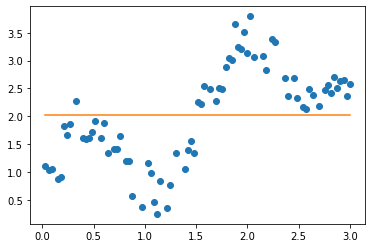

In [6]:
x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1) 
plt.plot(X_train, y_train, 'o')
plt.plot(x, model.predict(pol_0.fit_transform(x))) 
plt.show()

That's odd!! When our hyperparameter is equal to 0, our function is even worse than the linear regression function... 
Let's try and see what's going on, shall we?

##### Question 4: The code below provides a function combining all the steps in making a polynomial regression (creating the model, fitting the model, and plotting the model) while asking an input for the hyperparameter. Try and figure out which hyperparameter gives the best model. Why is this so? 

The R2 score of this model on the train set is: 0.912780646471296


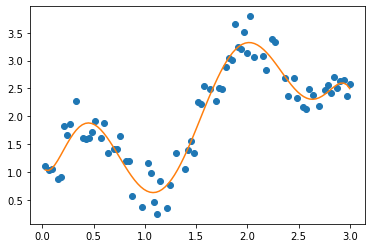

In [22]:
def poly_test(x):
    pol_exp = PolynomialFeatures(degree=x)
    model = LinearRegression()
    model.fit(pol_exp.fit_transform(X_train), y_train)
    print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_train), y_train))
    #plt.scatter(X_train, y_train)
    x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1) 
    plt.plot(X_train, y_train, 'o')
    plt.plot(x, model.predict(pol_exp.fit_transform(x))) 
    plt.show()
    
poly_test(7)    

## 2.4 Model Evaluation

The evaluation criteria we have used for the linear regression model are still valid for polynomial regression. Make the following exercise to see if you can get some information from it:

##### Question 5: Calculate both evaluation criteria we have seen for all the models you have tried in question 4. Does it confirm your suspicions?

## 2.5 Exercises

##### Question 1: See section 2.2

##### Question 2: See section 2.2

##### Question 3: See section 2.2

##### Question 4: See section 2.3.2

##### Question 5: See section 2.4